<a href="https://colab.research.google.com/github/KeitaW/Colab-Notebooks/blob/master/%E9%81%A9%E5%90%88%E5%BA%A6%E6%A4%9C%E5%AE%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chisquare, poisson

## ケース　1： 地震
大地震の月別の発生回数が一様分布に従うかを適合度検定によって調べる

In [ ]:
nankai_df = pd.DataFrame({
    "month": np.arange(1, 13),
    "frequency": [0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 5]
})

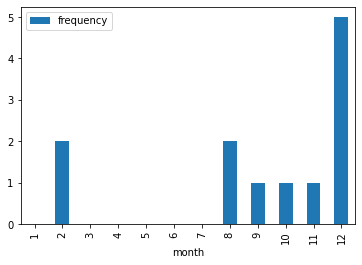

In [ ]:
nankai_df.plot(x="month", y="frequency", kind="bar")

In [ ]:
chisquare(f_obs=nankai_df.frequency)

Power_divergenceResult(statistic=24.0, pvalue=0.012733203282309948)

In [ ]:
chisquare(
    f_obs=nankai_df.frequency,
    f_exp=(nankai_df.frequency.sum() / len(nankai_df.frequency)) * np.ones_like(nankai_df.frequency)
)

Power_divergenceResult(statistic=24.0, pvalue=0.012733203282309948)

このことはもし、地震がどの月でも同じ確率で発生する場合に観測データが得られる確率が約$1.27$%であることを示す。
statistic=24.0はχ二乗値が24以上であるという意味であり、「ズレの大きさ」を表す。

## ケース２： 年間航空機事故数
年間の航空事故の回数と該当する年の数を表した以下のデータが、ポアソン分布に従っているかを適合度検定により求める。

In [5]:
aviation_accident_df = pd.DataFrame({
    "n_accident": np.arange(9),
    "n_years": [1, 6, 6, 8, 5, 7, 0, 1, 0]
})

In [6]:
aviation_accident_df

,n_accident,n_years
0,0,1
1,1,6
2,2,6
3,3,8
4,4,5
5,5,7
6,6,0
7,7,1
8,8,0


In [8]:
mean_n_accident = (aviation_accident_df.n_accident * aviation_accident_df.n_years).sum() / aviation_accident_df.n_years.sum()

In [9]:
mean_n_accident

3.0588235294117645

平均$\mu$が`mean_n_accident`であるとき$k=0, 1, \dots, 8$に対する$P(X=k)$の値は以下の通り


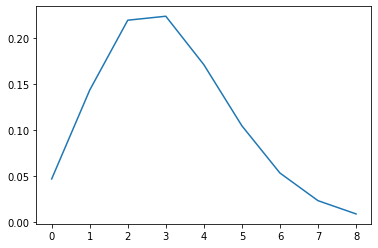

In [13]:
plt.plot(poisson.pmf(k=np.arange(9), mu=mean_n_accident))

ポアソン分布の場合は、$k$をどこまでで打ち切るかという問題が生ずる。実際には無限回の事故は考えられないため。


### ケースI データ中の8回を8回以上と解釈した場合

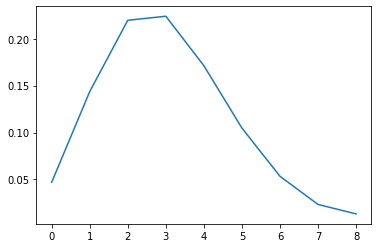

In [21]:
poisprob = poisson.pmf(np.arange(8), mu=mean_n_accident)
theory = np.append(poisprob, 1-np.sum(poisprob))
plt.plot(theory)

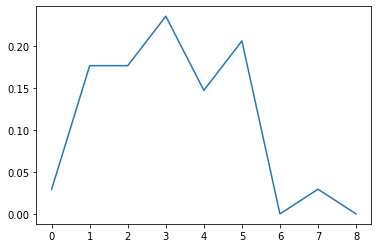

In [25]:
plt.plot(aviation_accident_df.n_years/aviation_accident_df.n_years.sum())

In [26]:
chisquare(f_obs=aviation_accident_df.n_years, f_exp=theory)

Power_divergenceResult(statistic=1311.3979647037704, pvalue=8.081667503230342e-278)

In [22]:
chisquare(f_obs=aviation_accident_df.n_years, f_exp=poisson.pmf(k=np.arange(9), mu=mean_n_accident))

Power_divergenceResult(statistic=1311.393661269225, pvalue=8.098996077993248e-278)

In [ ]:
# 